# Proyecto

In [32]:
pip install imblearn


     -------------------------------------- 226.0/226.0 kB 1.3 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 3.1 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [33]:
#Importar las librerias a utilizar, pandas, numpy, seaborn y matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#Import libraries
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv("Android_Malware.csv")

C:\Users\Admin\AppData\Local\Temp\ipykernel_6580\3974837586.py:1: DtypeWarning: Columns (56,58,63) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv("Android_Malware.csv")


In [3]:
dataset.describe()

Unnamed: 0   Source Port   Destination Port       Protocol  \
count  355630.000000  3.556300e+05       3.556300e+05  355630.000000   
mean     1945.719231  3.914129e+04       5.202541e+03       9.765190   
std      1840.477646  1.794632e+04       1.452135e+04     750.541237   
min         0.000000  0.000000e+00       0.000000e+00       0.000000   
25%       640.000000  3.455900e+04       8.000000e+01       6.000000   
50%      1568.000000  4.322600e+04       4.430000e+02       6.000000   
75%      2718.000000  5.228300e+04       4.430000e+02       6.000000   
max     14157.000000  1.045267e+06       1.328159e+06  442719.666667   

        Flow Duration   Total Fwd Packets   Total Backward Packets  \
count    3.556300e+05       355630.000000             3.556300e+05   
mean     1.092975e+07            7.433718             1.420368e+01   
std      2.180861e+07           81.015658             2.220247e+03   
min     -1.000000e+00            0.000000             0.000000e+00   
25%      4.888600e+04            1.000000             0.000000e+00   
50%      5.602255e+05            2.000000             1.000000e+00   
75%      1.076907e+07            5.000000             4.000000e+00   
max      1.199999e+08        27165.000000             1.319105e+06   

       Total Length of Fwd Packets   Total Length of Bwd Packets  \
count                 3.556300e+05                  3.556300e+05   
mean                  6.796042e+02                  1.129508e+04   
std                   1.942007e+04                  2.763871e+05   
min                   0.000000e+00                  0.000000e+00   
25%                   0.000000e+00                  0.000000e+00   
50%                   3.100000e+01                  2.600000e+01   
75%                   4.300000e+02                  3.010000e+02   
max                   9.043781e+06                  8.050972e+07   

        Fwd Packet Length Max  ...   act_data_pkt_fwd   min_seg_size_forward  \
count            3.556300e+05  ...      355626.000000           3.556260e+05   
mean             2.150150e+02  ...           1.524405          -2.831850e+04   
std              1.834912e+03  ...          14.938322           5.543875e+06   
min              0.000000e+00  ...           0.000000          -1.395063e+09   
25%              0.000000e+00  ...           0.000000           2.000000e+01   
50%              3.100000e+01  ...           0.000000           3.200000e+01   
75%              3.430000e+02  ...           1.000000           3.200000e+01   
max              1.072354e+06  ...        6335.000000           1.705248e+08   

        Active Mean    Active Std    Active Max    Active Min     Idle Mean  \
count  3.556260e+05  3.556260e+05  3.556260e+05  3.556260e+05  3.556260e+05   
mean   1.628143e+05  2.195225e+04  1.851564e+05  1.456534e+05  4.025724e+06   
std    8.817765e+05  2.860244e+05  1.019477e+06  8.423659e+05  1.441518e+07   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
max    9.718488e+07  4.020815e+07  9.718488e+07  9.718488e+07  1.199514e+08   

           Idle Std      Idle Max      Idle Min  
count  3.556260e+05  3.556260e+05  3.556260e+05  
mean   3.182527e+05  4.304876e+06  3.779037e+06  
std    2.882901e+06  1.514008e+07  1.407042e+07  
min    0.000000e+00  0.000000e+00  0.000000e+00  
25%    0.000000e+00  0.000000e+00  0.000000e+00  
50%    0.000000e+00  0.000000e+00  0.000000e+00  
75%    0.000000e+00  0.000000e+00  0.000000e+00  
max    7.737303e+07  1.199514e+08  1.199514e+08  

[8 rows x 78 columns]

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355630 entries, 0 to 355629
Data columns (total 86 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    355630 non-null  int64  
 1   Flow ID                       355629 non-null  object 
 2    Source IP                    355630 non-null  object 
 3    Source Port                  355630 non-null  int64  
 4    Destination IP               355630 non-null  object 
 5    Destination Port             355630 non-null  float64
 6    Protocol                     355630 non-null  float64
 7    Timestamp                    355630 non-null  object 
 8    Flow Duration                355630 non-null  int64  
 9    Total Fwd Packets            355630 non-null  int64  
 10   Total Backward Packets       355630 non-null  int64  
 11  Total Length of Fwd Packets   355630 non-null  float64
 12   Total Length of Bwd Packets  355630 non-nul

In [5]:
dataset[['Flow ID',' Source IP',' Destination IP',' Timestamp',' CWE Flag Count',' Down/Up Ratio','Fwd Avg Bytes/Bulk','Label']]

Flow ID     Source IP  \
0         172.217.6.202-10.42.0.211-443-50004-6   10.42.0.211   
1         172.217.6.202-10.42.0.211-443-35455-6   10.42.0.211   
2         131.253.61.68-10.42.0.211-443-51775-6   10.42.0.211   
3         131.253.61.68-10.42.0.211-443-51775-6   10.42.0.211   
4         131.253.61.68-10.42.0.211-443-51776-6   10.42.0.211   
...                                         ...           ...   
355625      172.217.7.14-10.42.0.211-80-38405-6  172.217.7.14   
355626         10.42.0.211-10.42.0.1-7632-53-17   10.42.0.211   
355627  10.42.0.211-104.192.110.245-45970-443-6   10.42.0.211   
355628        10.42.0.211-10.42.0.1-51982-53-17   10.42.0.211   
355629         10.42.0.211-10.42.0.1-9320-53-17   10.42.0.211   

         Destination IP            Timestamp  CWE Flag Count  Down/Up Ratio  \
0         172.217.6.202  13/06/2017 11:52:39               0            1.0   
1         172.217.6.202  13/06/2017 11:52:39               0            1.0   
2         131.253.61.68  13/06/2017 11:52:42               0            1.0   
3         131.253.61.68  13/06/2017 11:52:43               0            0.0   
4         131.253.61.68  13/06/2017 11:52:42               0            0.0   
...                 ...                  ...             ...            ...   
355625      10.42.0.211  17/06/2017 01:29:11               0            1.0   
355626        10.42.0.1  17/06/2017 01:30:33               0            1.0   
355627  104.192.110.245  17/06/2017 01:29:45               0            0.0   
355628        10.42.0.1  17/06/2017 01:29:45               0            1.0   
355629        10.42.0.1  17/06/2017 01:30:33               0            1.0   

       Fwd Avg Bytes/Bulk           Label  
0                       0  Android_Adware  
1                       0  Android_Adware  
2                       0  Android_Adware  
3                       0  Android_Adware  
4                       0  Android_Adware  
...                   ...             ...  
355625                  0          Benign  
355626                  0          Benign  
355627                  0          Benign  
355628                  0          Benign  
355629                  0          Benign  

[355630 rows x 8 columns]

In [6]:
dataset['Label'] = dataset['Label'].apply(lambda x: 1 if x == 'Android_Adware' or x == 'Android_Scareware' or x == 'Android_SMS_Malware' else 0)

In [7]:
dataset[['Flow ID',' Source IP',' Destination IP',' Timestamp',' CWE Flag Count',' Down/Up Ratio','Fwd Avg Bytes/Bulk','Label']]

Flow ID     Source IP  \
0         172.217.6.202-10.42.0.211-443-50004-6   10.42.0.211   
1         172.217.6.202-10.42.0.211-443-35455-6   10.42.0.211   
2         131.253.61.68-10.42.0.211-443-51775-6   10.42.0.211   
3         131.253.61.68-10.42.0.211-443-51775-6   10.42.0.211   
4         131.253.61.68-10.42.0.211-443-51776-6   10.42.0.211   
...                                         ...           ...   
355625      172.217.7.14-10.42.0.211-80-38405-6  172.217.7.14   
355626         10.42.0.211-10.42.0.1-7632-53-17   10.42.0.211   
355627  10.42.0.211-104.192.110.245-45970-443-6   10.42.0.211   
355628        10.42.0.211-10.42.0.1-51982-53-17   10.42.0.211   
355629         10.42.0.211-10.42.0.1-9320-53-17   10.42.0.211   

         Destination IP            Timestamp  CWE Flag Count  Down/Up Ratio  \
0         172.217.6.202  13/06/2017 11:52:39               0            1.0   
1         172.217.6.202  13/06/2017 11:52:39               0            1.0   
2         131.253.61.68  13/06/2017 11:52:42               0            1.0   
3         131.253.61.68  13/06/2017 11:52:43               0            0.0   
4         131.253.61.68  13/06/2017 11:52:42               0            0.0   
...                 ...                  ...             ...            ...   
355625      10.42.0.211  17/06/2017 01:29:11               0            1.0   
355626        10.42.0.1  17/06/2017 01:30:33               0            1.0   
355627  104.192.110.245  17/06/2017 01:29:45               0            0.0   
355628        10.42.0.1  17/06/2017 01:29:45               0            1.0   
355629        10.42.0.1  17/06/2017 01:30:33               0            1.0   

       Fwd Avg Bytes/Bulk  Label  
0                       0      1  
1                       0      1  
2                       0      1  
3                       0      1  
4                       0      1  
...                   ...    ...  
355625                  0      0  
355626                  0      0  
355627                  0      0  
355628                  0      0  
355629                  0      0  

[355630 rows x 8 columns]

<AxesSubplot:>

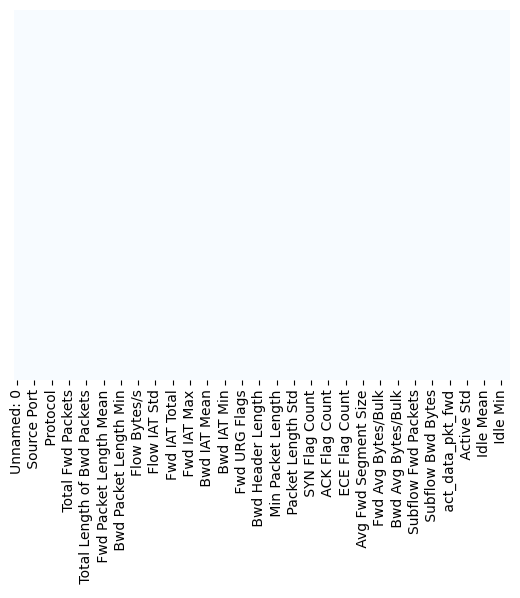

In [8]:
#Revisar si faltan datos
sns.heatmap(dataset.isnull(),yticklabels=False, cbar=False,cmap='Blues')

In [9]:
#borramos las columnas que son unicas para cada registro o que no importan mucho como fechas, etc.
dataset.drop(['Flow ID',' Timestamp','Unnamed: 0', ' Source IP', ' Destination IP', ' CWE Flag Count', ' Down/Up Ratio', 'Fwd Avg Bytes/Bulk'], axis=1, inplace=True)

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355630 entries, 0 to 355629
Data columns (total 78 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Source Port                  355630 non-null  int64  
 1    Destination Port             355630 non-null  float64
 2    Protocol                     355630 non-null  float64
 3    Flow Duration                355630 non-null  int64  
 4    Total Fwd Packets            355630 non-null  int64  
 5    Total Backward Packets       355630 non-null  int64  
 6   Total Length of Fwd Packets   355630 non-null  float64
 7    Total Length of Bwd Packets  355630 non-null  float64
 8    Fwd Packet Length Max        355630 non-null  float64
 9    Fwd Packet Length Min        355630 non-null  float64
 10   Fwd Packet Length Mean       355630 non-null  float64
 11   Fwd Packet Length Std        355630 non-null  float64
 12  Bwd Packet Length Max         355630 non-nul

<AxesSubplot:>

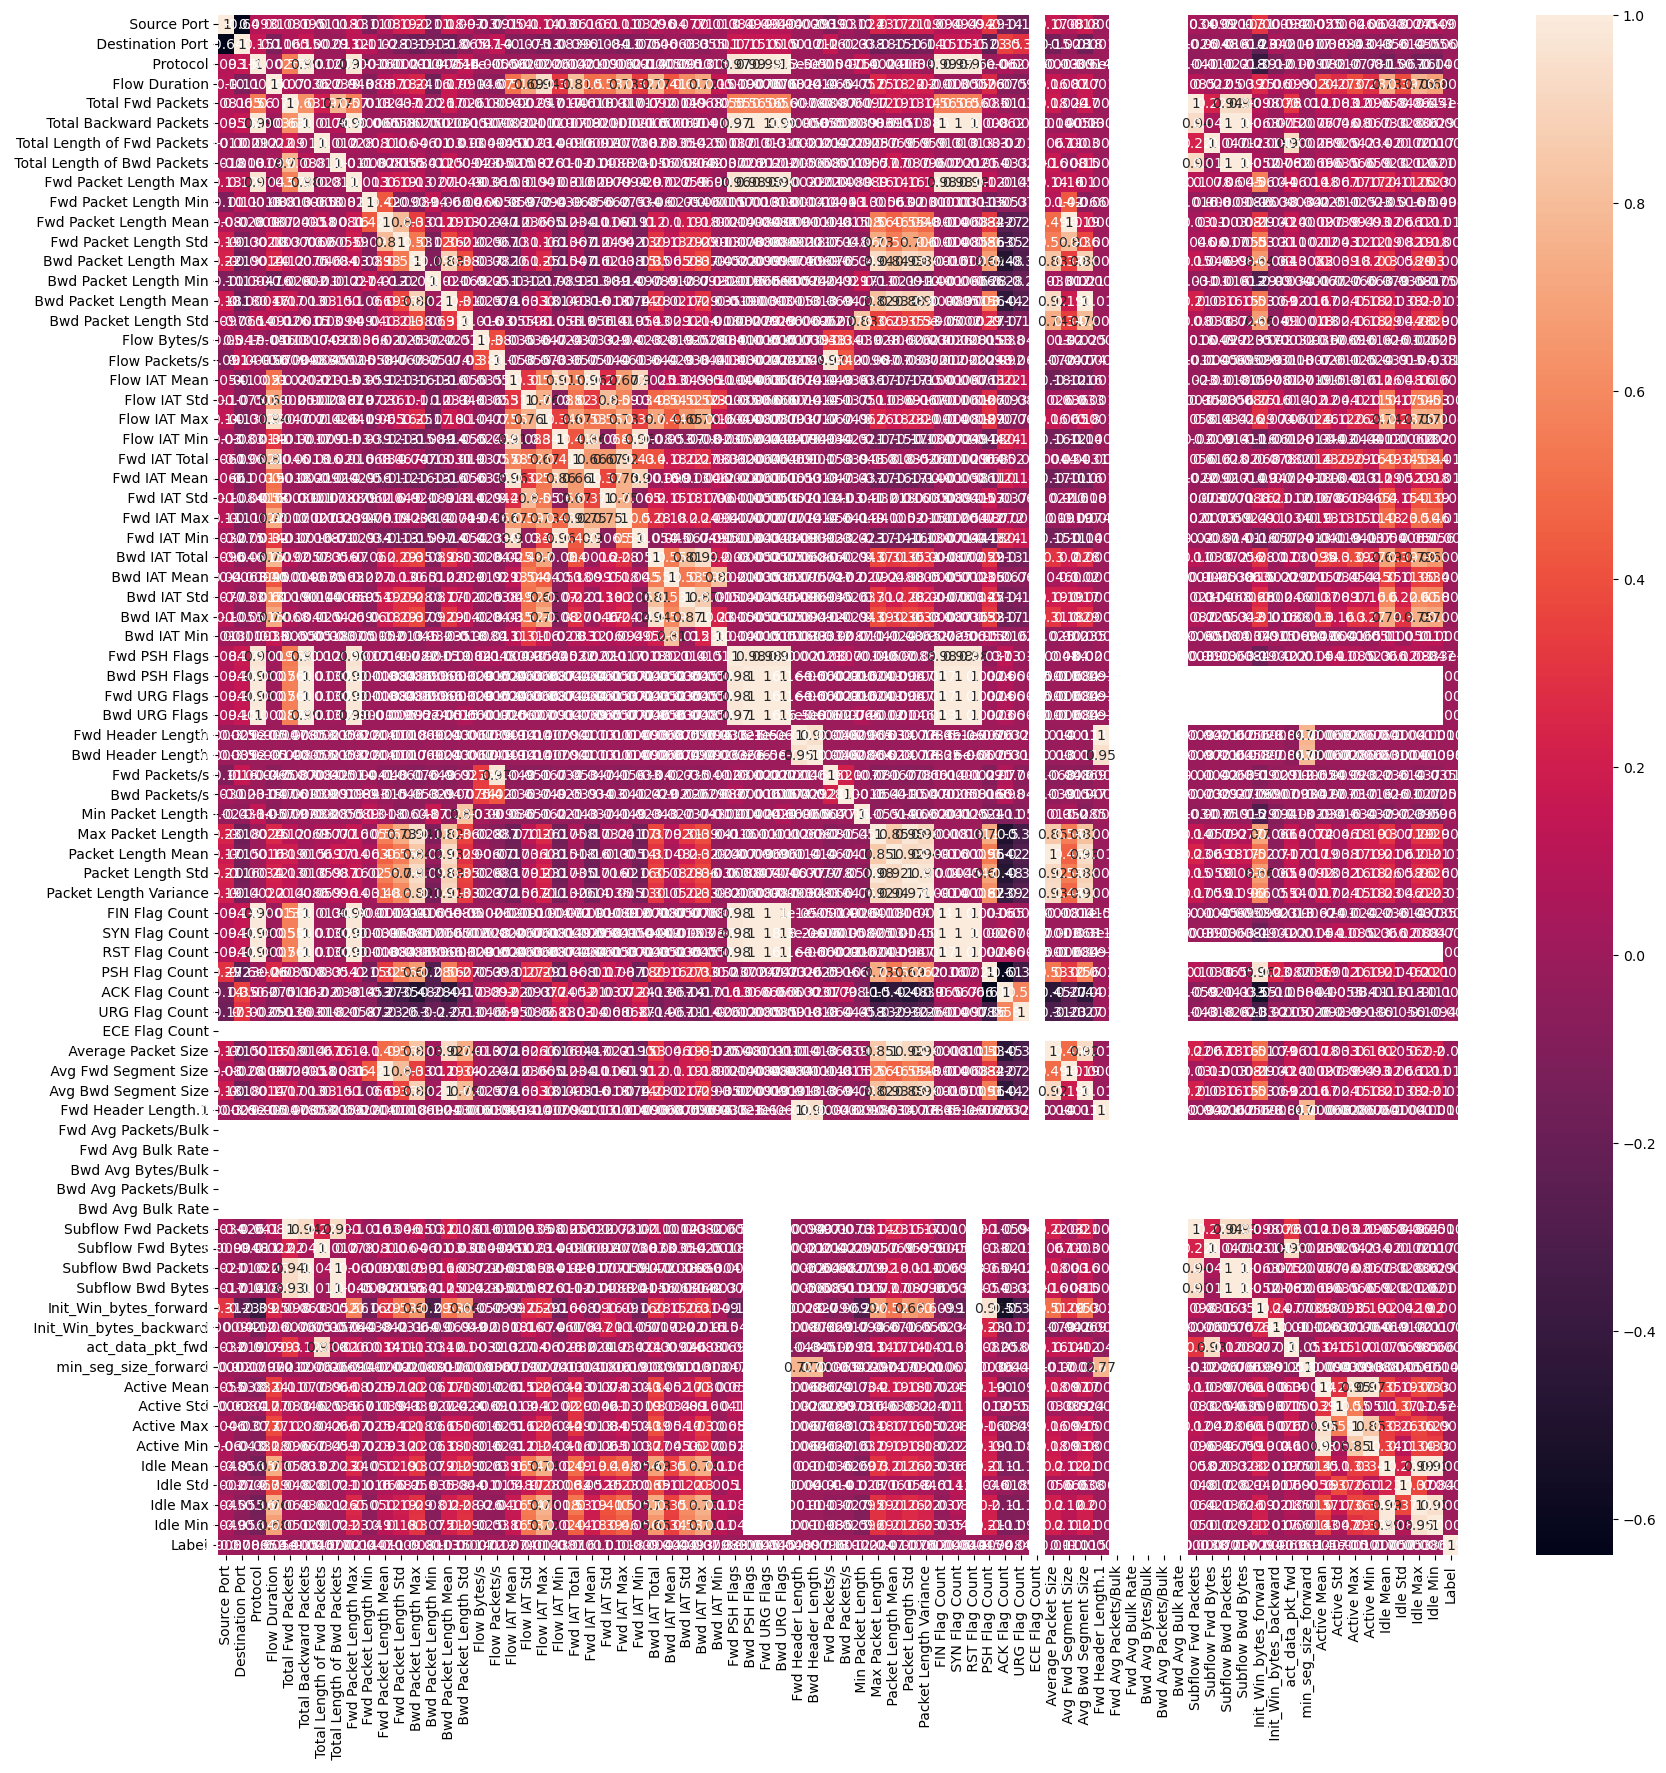

In [11]:
#Realizar un análisis de correlación
correlation = dataset.corr()
correlation

f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlation,annot=True)

In [12]:
# Analizar columnas con datos nulos
valores = dataset.isna().sum(axis = 0)
print(valores)

# Sustituir por promedio de la misma columna (las que tienen nulos)
for columna in dataset.columns:
    dataset[columna].fillna(value = dataset[columna].mean(), inplace = True)
    dataset.isna().sum(axis = 0)[columna]

 Source Port          0
 Destination Port     0
 Protocol             0
 Flow Duration        0
 Total Fwd Packets    0
                     ..
Idle Mean             4
 Idle Std             4
 Idle Max             4
 Idle Min             4
Label                 0
Length: 78, dtype: int64


In [13]:
# Verificar que no tengamos valores nulos
valores = dataset.isna().sum(axis = 0)
print(valores)

 Source Port          0
 Destination Port     0
 Protocol             0
 Flow Duration        0
 Total Fwd Packets    0
                     ..
Idle Mean             0
 Idle Std             0
 Idle Max             0
 Idle Min             0
Label                 0
Length: 78, dtype: int64


In [14]:
# Imprimimos una de las columnas para averiguar que sucede
print(dataset[' Fwd Avg Packets/Bulk'])

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
355625    0.0
355626    0.0
355627    0.0
355628    0.0
355629    0.0
Name:  Fwd Avg Packets/Bulk, Length: 355630, dtype: float64


C:\Users\Admin\AppData\Local\Temp\ipykernel_6580\579222798.py:8: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  dataset.hist(ax=ax)


array([[<AxesSubplot:title={'center':' Source Port'}>,
        <AxesSubplot:title={'center':' Destination Port'}>,
        <AxesSubplot:title={'center':' Protocol'}>,
        <AxesSubplot:title={'center':' Flow Duration'}>,
        <AxesSubplot:title={'center':' Total Fwd Packets'}>,
        <AxesSubplot:title={'center':' Total Backward Packets'}>,
        <AxesSubplot:title={'center':'Total Length of Fwd Packets'}>,
        <AxesSubplot:title={'center':' Total Length of Bwd Packets'}>,
        <AxesSubplot:title={'center':' Fwd Packet Length Max'}>],
       [<AxesSubplot:title={'center':' Fwd Packet Length Min'}>,
        <AxesSubplot:title={'center':' Fwd Packet Length Mean'}>,
        <AxesSubplot:title={'center':' Fwd Packet Length Std'}>,
        <AxesSubplot:title={'center':'Bwd Packet Length Max'}>,
        <AxesSubplot:title={'center':' Bwd Packet Length Min'}>,
        <AxesSubplot:title={'center':' Bwd Packet Length Mean'}>,
        <AxesSubplot:title={'center':' Bwd Packet L

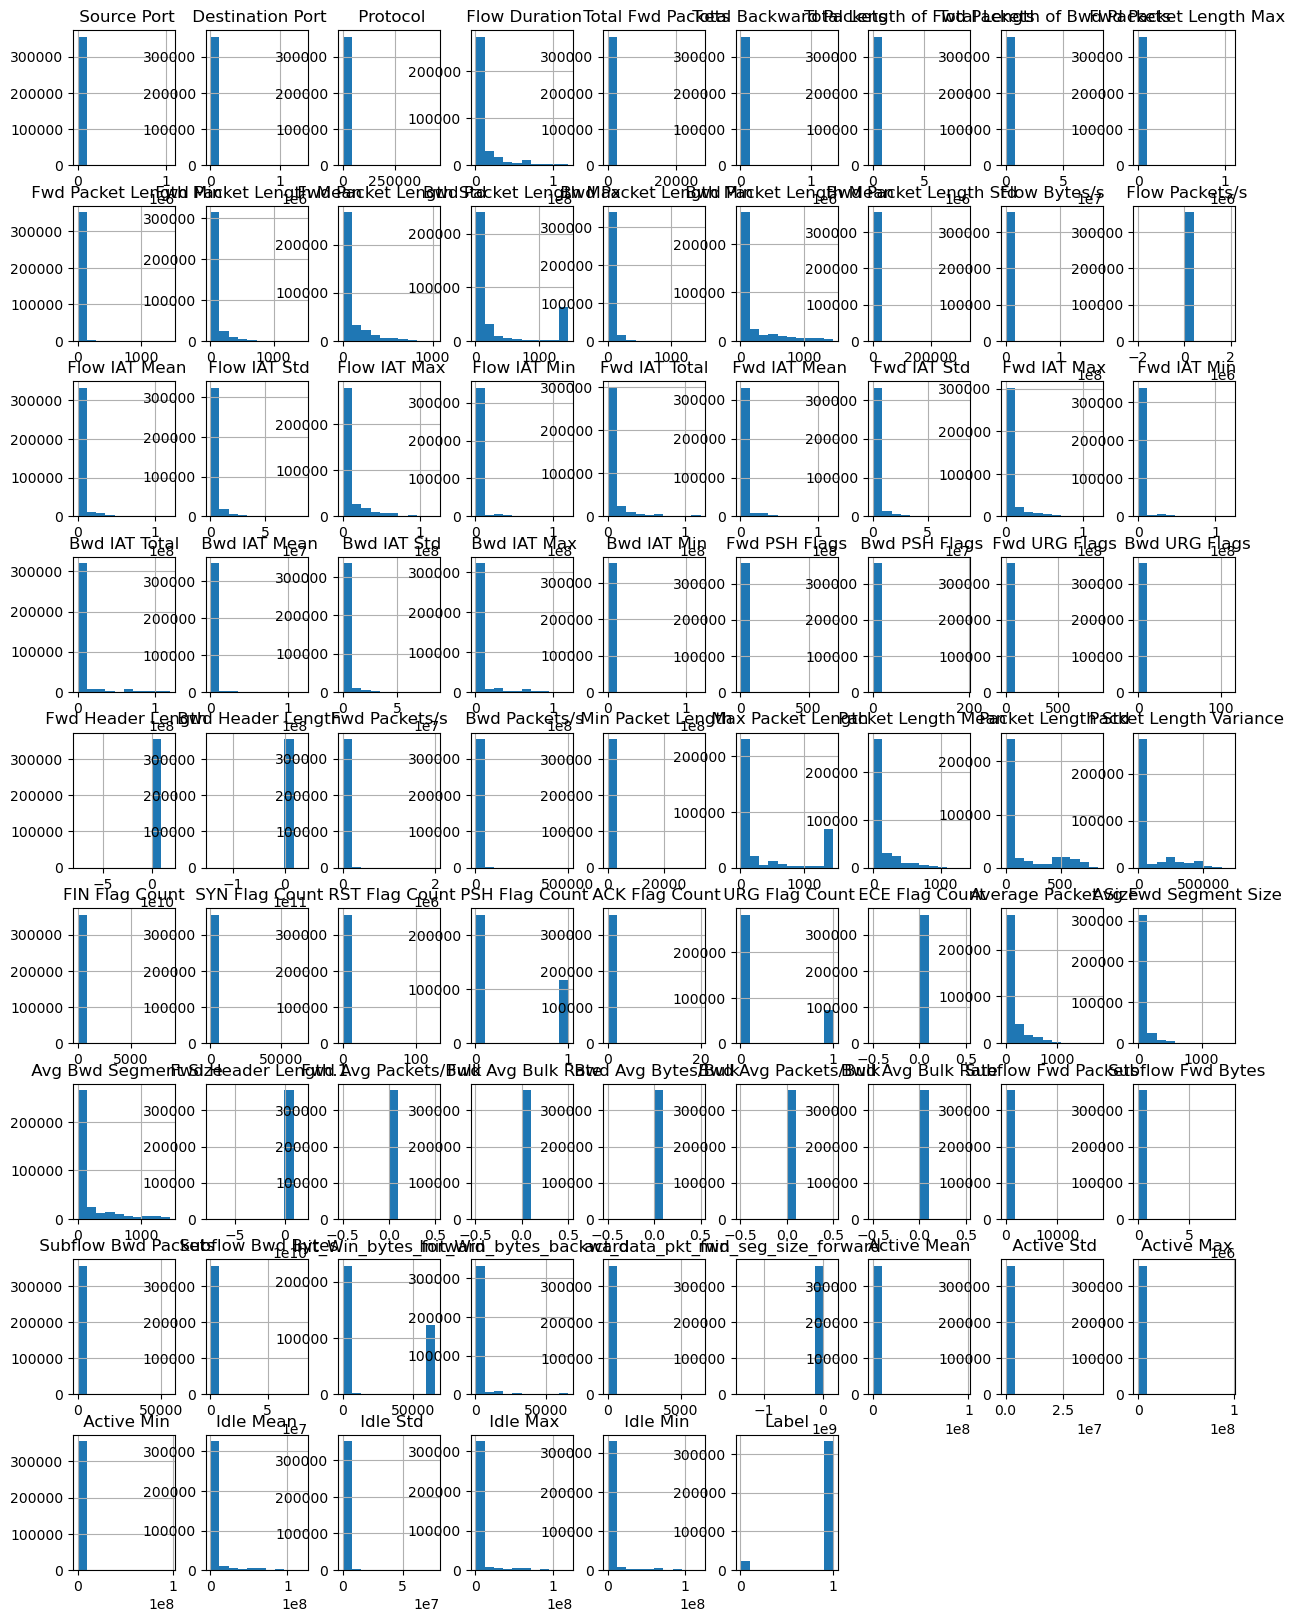

In [15]:
#Revisar los histogramas de cada columna
#En cada gráfica visualizar aquéllas columnas donde se repita el mismo valor en todos los datos
#Esto para eliminar columnas donde sean unicamente 0.0
#dataset.hist(bins = 30, figsize = (20, 20), color = 'b')

fig = plt.figure(figsize=(15,20))
ax = fig.gca()
dataset.hist(ax=ax)


In [16]:
#borramos las columnas donde se repite el mismo valor 
dataset.drop([' Active Max', ' Active Std', 'Active Mean', ' min_seg_size_forward', ' Active Min', ' act_data_pkt_fwd', ' Subflow Bwd Bytes', ' Subflow Bwd Packets', ' Subflow Fwd Bytes', 'Subflow Fwd Packets', 'Bwd Avg Bulk Rate',' Bwd Avg Packets/Bulk',' Bwd Avg Bytes/Bulk',' Fwd Avg Bulk Rate',' Fwd Avg Packets/Bulk',' Fwd Header Length.1',' ECE Flag Count', ' ACK Flag Count',' RST Flag Count',' SYN Flag Count', 'FIN Flag Count',' Min Packet Length',' Bwd Header Length', ' Fwd Header Length',' Bwd URG Flags', ' Fwd URG Flags',' Bwd PSH Flags','Fwd PSH Flags',' Bwd IAT Min',' Flow Packets/s','Flow Bytes/s',' Bwd Packet Length Std',' Fwd Packet Length Max', ' Total Length of Bwd Packets','Total Length of Fwd Packets',' Total Backward Packets',' Total Fwd Packets',' Protocol',' Destination Port',' Source Port'], axis=1, inplace=True)

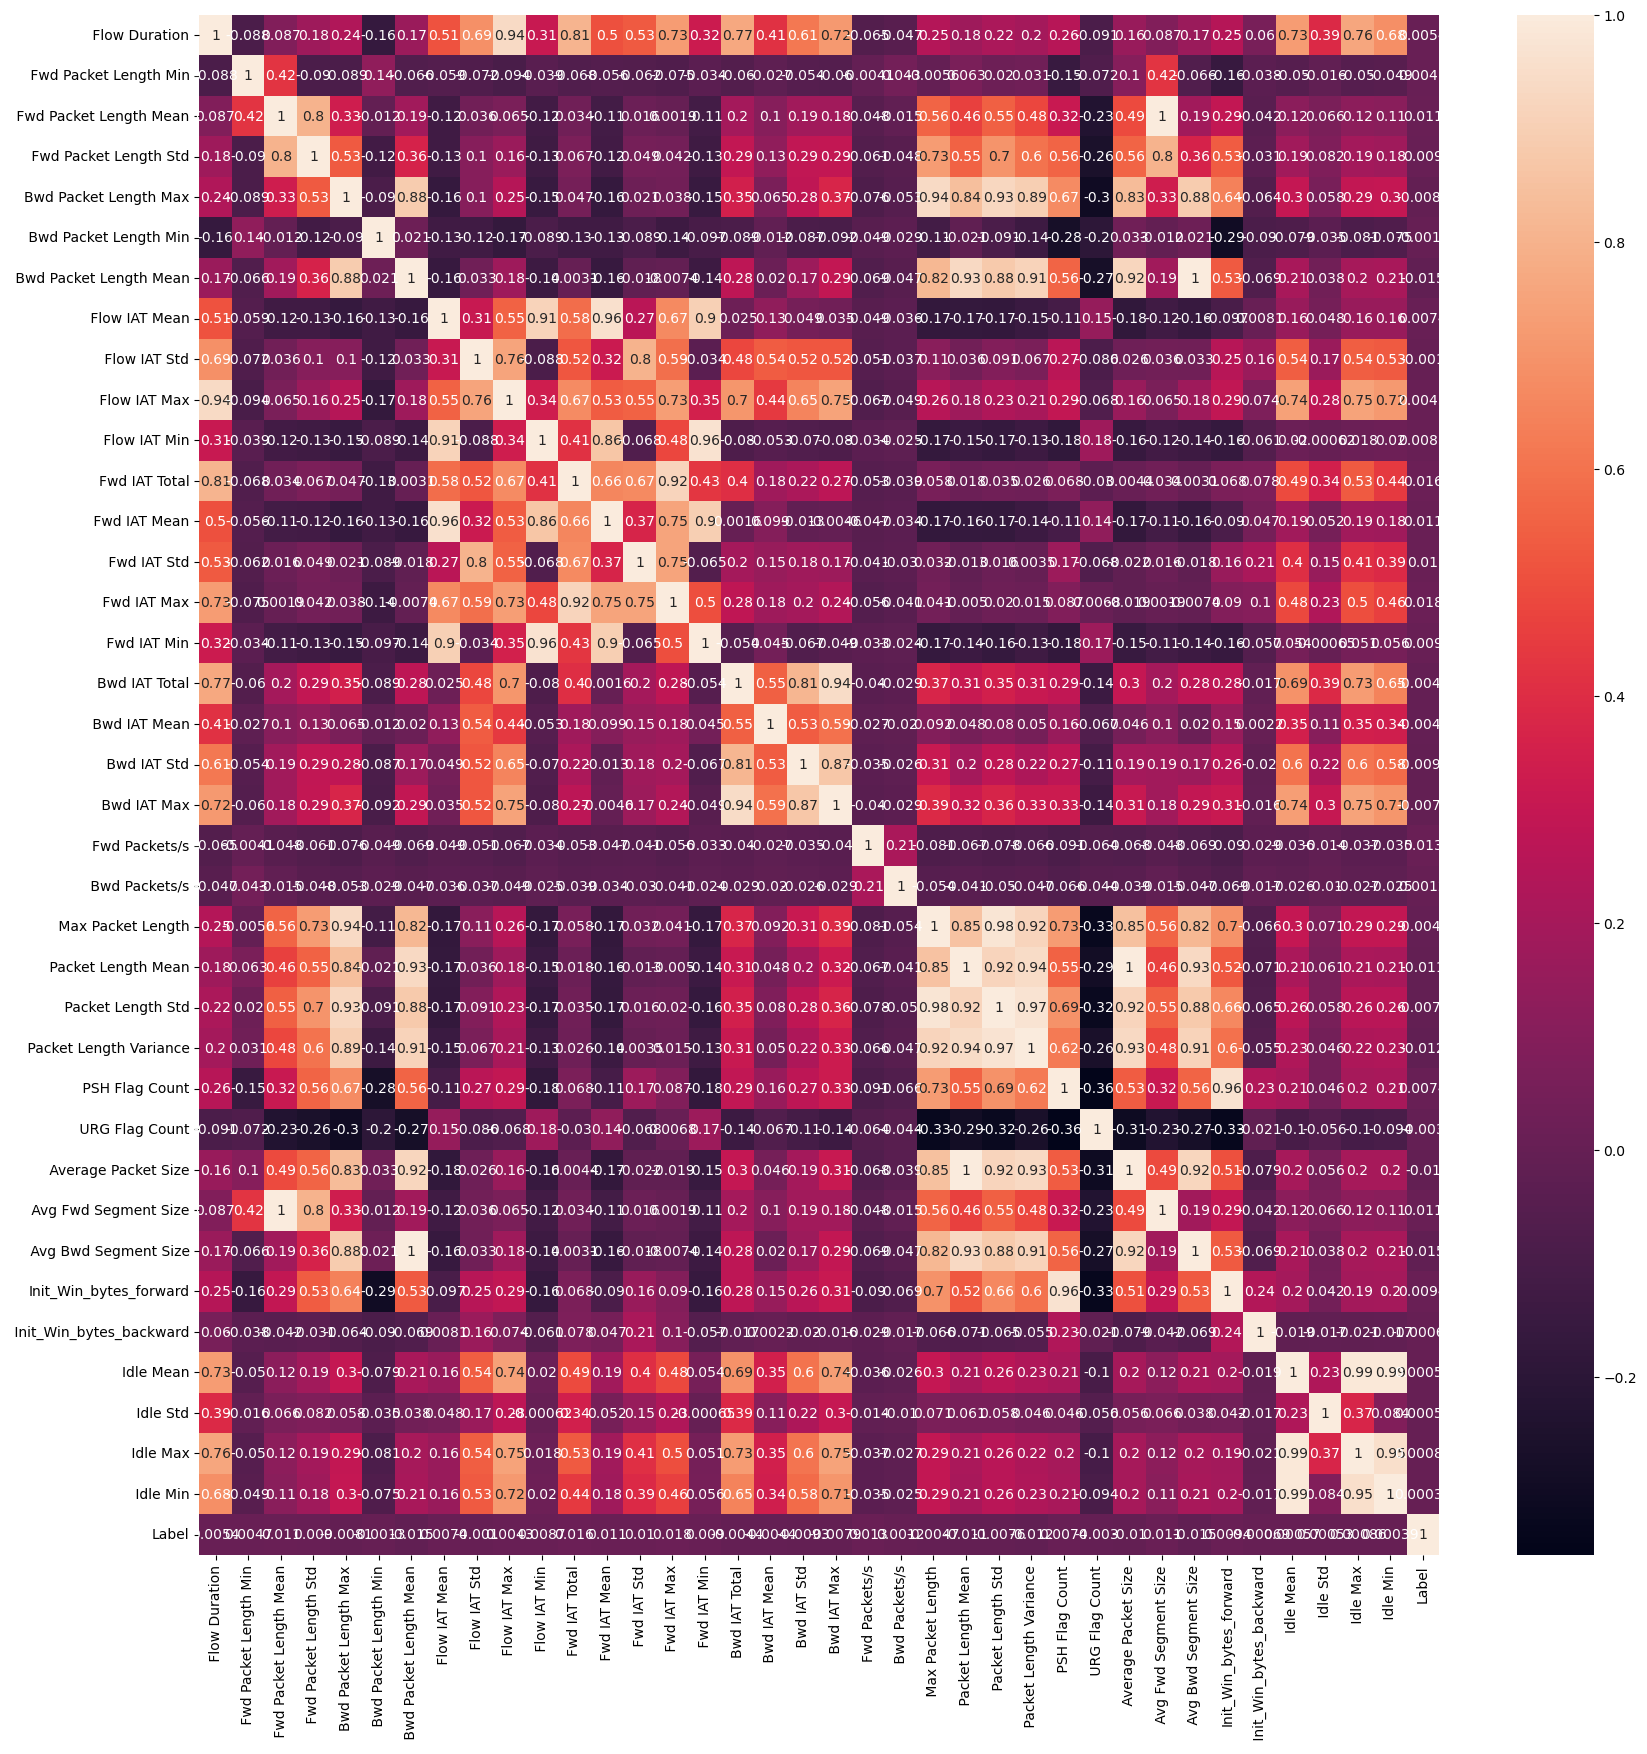

In [30]:
# Nuevamente generamos el análisis de correlación
correlation = dataset.corr()
correlation
dataset.to_csv('DATASET.csv')
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlation,annot=True)